### Problem
The number of shoes sold by an e-commerce company during the first three months(12 weeks) of the year were:
23 21 19 24 35 17 18 24 33 27 21 23

Meanwhile, the company developed some dynamic price optimization algorithms and the sales for the next 12 weeks were:
31 28 19 24 32 27 16 41 23 32 29 33

Did the dynamic price optimization algorithm deliver superior results? Can it be trusted?

### Solution

Before we get onto different approaches, let's quickly get a feel for the data



In [1]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
#Load the data
before_opt = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [3]:
before_opt.mean()

23.75

In [4]:
after_opt.mean()

27.916666666666668

In [5]:
observed_difference = after_opt.mean() - before_opt.mean()

In [6]:
print "Difference between the means is:", observed_difference

Difference between the means is: 4.16666666667


On average, the sales after optimization is more than the sales before optimization. But is the difference legit? Could it be due to chance?

**Classical Method** : We could cover this method later on. This entails doing a *t-test* 

**Hacker's Method** : Let's see if we can provide a hacker's perspective to this problem, similar to what we did in the previous notebook.

In [7]:
#Step 1: Create the dataset. Let's give Label 0 to before_opt and Label 1 to after_opt

In [8]:
#Learn about the following three functions

In [ ]:
?np.append

In [ ]:
?np.zeros

In [ ]:
?np.ones

In [9]:
shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])),
np.append(before_opt, after_opt)], dtype=int)

In [10]:
print "Shape:", shoe_sales.shape
print "Data:", "\n", shoe_sales

Shape: (2, 24)
Data: 
[[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1]
 [23 21 19 24 35 17 18 24 33 27 21 23 31 28 19 24 32 27 16 41 23 32 29 33]]


In [11]:
shoe_sales = shoe_sales.T
print "Shape:",shoe_sales.shape
print "Data:", "\n", shoe_sales

Shape: (24, 2)
Data: 
[[ 0 23]
 [ 0 21]
 [ 0 19]
 [ 0 24]
 [ 0 35]
 [ 0 17]
 [ 0 18]
 [ 0 24]
 [ 0 33]
 [ 0 27]
 [ 0 21]
 [ 0 23]
 [ 1 31]
 [ 1 28]
 [ 1 19]
 [ 1 24]
 [ 1 32]
 [ 1 27]
 [ 1 16]
 [ 1 41]
 [ 1 23]
 [ 1 32]
 [ 1 29]
 [ 1 33]]


In [12]:
#This is the approach we are going to take
#We are going to randomly shuffle the labels. Then compute the mean between the two groups. 
#Find the % of times when the difference between the means computed is greater than what we observed above
#If the % of times is less than 5%, we would make the call that the improvements are real

In [13]:
np.random.shuffle(shoe_sales)

In [14]:
shoe_sales

array([[ 1, 24],
       [ 1, 32],
       [ 0, 27],
       [ 1, 16],
       [ 0, 33],
       [ 0, 23],
       [ 0, 24],
       [ 0, 24],
       [ 0, 21],
       [ 0, 23],
       [ 1, 32],
       [ 1, 41],
       [ 1, 19],
       [ 1, 23],
       [ 1, 27],
       [ 1, 29],
       [ 0, 18],
       [ 0, 17],
       [ 1, 33],
       [ 1, 28],
       [ 0, 19],
       [ 0, 21],
       [ 1, 31],
       [ 0, 35]])

In [15]:
experiment_label = np.random.randint(0,2,shoe_sales.shape[0])

In [16]:
experiment_label

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0])

In [17]:
experiment_data = np.array([experiment_label, shoe_sales[:,1]])
experiment_data = experiment_data.T
print experiment_data

[[ 1 24]
 [ 1 32]
 [ 1 27]
 [ 0 16]
 [ 1 33]
 [ 0 23]
 [ 0 24]
 [ 1 24]
 [ 0 21]
 [ 1 23]
 [ 0 32]
 [ 0 41]
 [ 0 19]
 [ 1 23]
 [ 1 27]
 [ 1 29]
 [ 0 18]
 [ 0 17]
 [ 1 33]
 [ 0 28]
 [ 1 19]
 [ 0 21]
 [ 1 31]
 [ 0 35]]


In [18]:
experiment_diff_mean =  experiment_data[experiment_data[:,0]==1].mean() \
                        - experiment_data[experiment_data[:,0]==0].mean()

In [19]:
experiment_diff_mean

1.75

In [20]:
#Like the previous notebook, let's repeat this experiment 100 and then 100000 times

In [21]:
def shuffle_experiment(number_of_times):
    experiment_diff_mean = np.empty([number_of_times,1])
    for times in np.arange(number_of_times):
        experiment_label = np.random.randint(0,2,shoe_sales.shape[0])
        experiment_data = np.array([experiment_label, shoe_sales[:,1]]).T
        experiment_diff_mean[times] =  experiment_data[experiment_data[:,0]==1].mean() \
                        - experiment_data[experiment_data[:,0]==0].mean()
    return experiment_diff_mean    

In [22]:
experiment_diff_mean = shuffle_experiment(100)

In [23]:
experiment_diff_mean[:10]

array([[-0.25555556],
       [ 2.41428571],
       [ 1.03125   ],
       [ 3.7027972 ],
       [ 0.33333333],
       [ 1.78888889],
       [ 2.6875    ],
       [-1.1       ],
       [ 1.96666667],
       [ 1.96666667]])

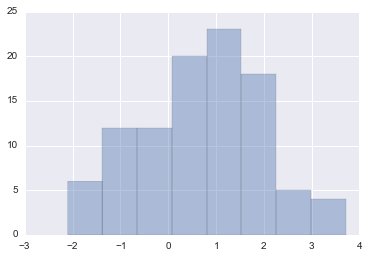

In [24]:
sns.distplot(experiment_diff_mean, kde=False)

In [25]:
#Finding % of times difference of means is greater than observed
print "Data: Difference in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference]

print "Number of times diff in mean greater than observed:", \
            experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]
print "% of times diff in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]/float(experiment_diff_mean.shape[0])*100

Data: Difference in mean greater than observed: []
Number of times diff in mean greater than observed: 0
% of times diff in mean greater than observed: 0.0


#### Exercise: Repeat the above for 100,000 runs and report the results

# Is the result by chance? 

### What is the justification for shuffling the labels? 

>Thought process is this: If price optimization had no real effect, then, the sales before optimization would often give more sales than sales after optimization. By shuffling, we are simulating the situation where that happens -  sales before optimization is greater than sales after optimization. If many such trials provide improvements, then, the price optimization has no effect. In statistical terms, *the observed difference could have occurred by chance*. 

Now, to show that the same difference in mean might lead to a different conclusion, let's try the same experiment with a different dataset. 

In [43]:
before_opt = np.array([230, 210, 190, 240, 350, 170, 180, 240, 330, 270, 210, 230])
after_opt = np.array([310, 180, 190, 240, 220, 240, 160, 410, 130, 320, 290, 210])

In [48]:
print "Mean sales before price optimization:", np.mean(before_opt)
print "Mean sales after price optimization:", np.mean(after_opt)
print "Difference in mean sales:", np.mean(after_opt) - np.mean(before_opt) #Same as above

Mean sales before price optimization: 237.5
Mean sales after price optimization: 241.666666667
Difference in mean sales: 4.16666666667


In [49]:
shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])),
np.append(before_opt, after_opt)], dtype=int)
shoe_sales = shoe_sales.T

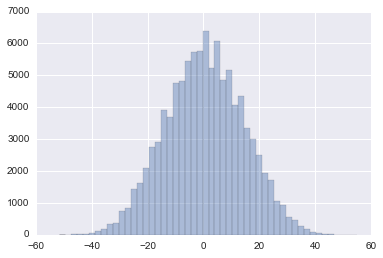

In [55]:
experiment_diff_mean = shuffle_experiment(100000)
sns.distplot(experiment_diff_mean, kde=False)

In [56]:
#Finding % of times difference of means is greater than observed
print "Number of times diff in mean greater than observed:", \
            experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]
print "% of times diff in mean greater than observed:", \
        experiment_diff_mean[experiment_diff_mean>=observed_difference].shape[0]/float(experiment_diff_mean.shape[0])*100

Number of times diff in mean greater than observed: 40639
% of times diff in mean greater than observed: 40.639


### Did the conclusion change now? 